In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
import math
import plotly.graph_objects as go
from sklearn.feature_selection import RFE
import xgboost as xgb
#Import GridSearchCV 
from sklearn.model_selection import GridSearchCV

In [3]:
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
print(train_df.isnull().sum())

Id                                     0
satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             351
dtype: int64


In [6]:
print(test_df.columns)
train_df.columns

Index(['Id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')


Index(['Id', 'satisfaction', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [7]:
print(f"Train file\n\nRow :{train_df.shape[0]}\nColumn:{train_df.shape[1]}\n\n\n")
print(f"Test file\n\nRow :{test_df.shape[0]}\nColumn:{test_df.shape[1]}")

Train file

Row :116892
Column:24



Test file

Row :12949
Column:23


In [ ]:
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

In [9]:
train_df['Customer Type'] = train_df['Customer Type'].str.title()
train_df['Type of Travel'] = train_df['Type of Travel'].str.title()

test_df['Customer Type'] = test_df['Customer Type'].str.title()
test_df['Type of Travel'] = test_df['Type of Travel'].str.title()

In [10]:
train_df.head(5)

,Id,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,86347,satisfied,Male,Loyal Customer,50,Business Travel,Business,1548,5,5,...,5,3,3,3,3,5,3,4,0,0.0
1,115822,satisfied,Male,Loyal Customer,51,Business Travel,Business,4020,5,5,...,4,5,5,5,5,5,5,5,53,51.0
2,16351,dissatisfied,Male,Loyal Customer,14,Personal Travel,Eco,2328,2,5,...,1,1,5,3,3,4,4,1,0,4.0
3,107284,satisfied,Female,Loyal Customer,52,Business Travel,Business,3761,2,2,...,5,4,4,4,4,4,4,5,61,55.0
4,5788,dissatisfied,Female,Loyal Customer,26,Personal Travel,Eco,3348,1,5,...,5,5,3,4,3,5,1,5,196,169.0


array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Seat comfort'}>],
       [<Axes: title={'center': 'Departure/Arrival time convenient'}>,
        <Axes: title={'center': 'Food and drink'}>,
        <Axes: title={'center': 'Gate location'}>,
        <Axes: title={'center': 'Inflight wifi service'}>],
       [<Axes: title={'center': 'Inflight entertainment'}>,
        <Axes: title={'center': 'Online support'}>,
        <Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'On-board service'}>],
       [<Axes: title={'center': 'Leg room service'}>,
        <Axes: title={'center': 'Baggage handling'}>,
        <Axes: title={'center': 'Checkin service'}>,
        <Axes: title={'center': 'Cleanliness'}>],
       [<Axes: title={'center': 'Online boarding'}>,
        <Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 'A

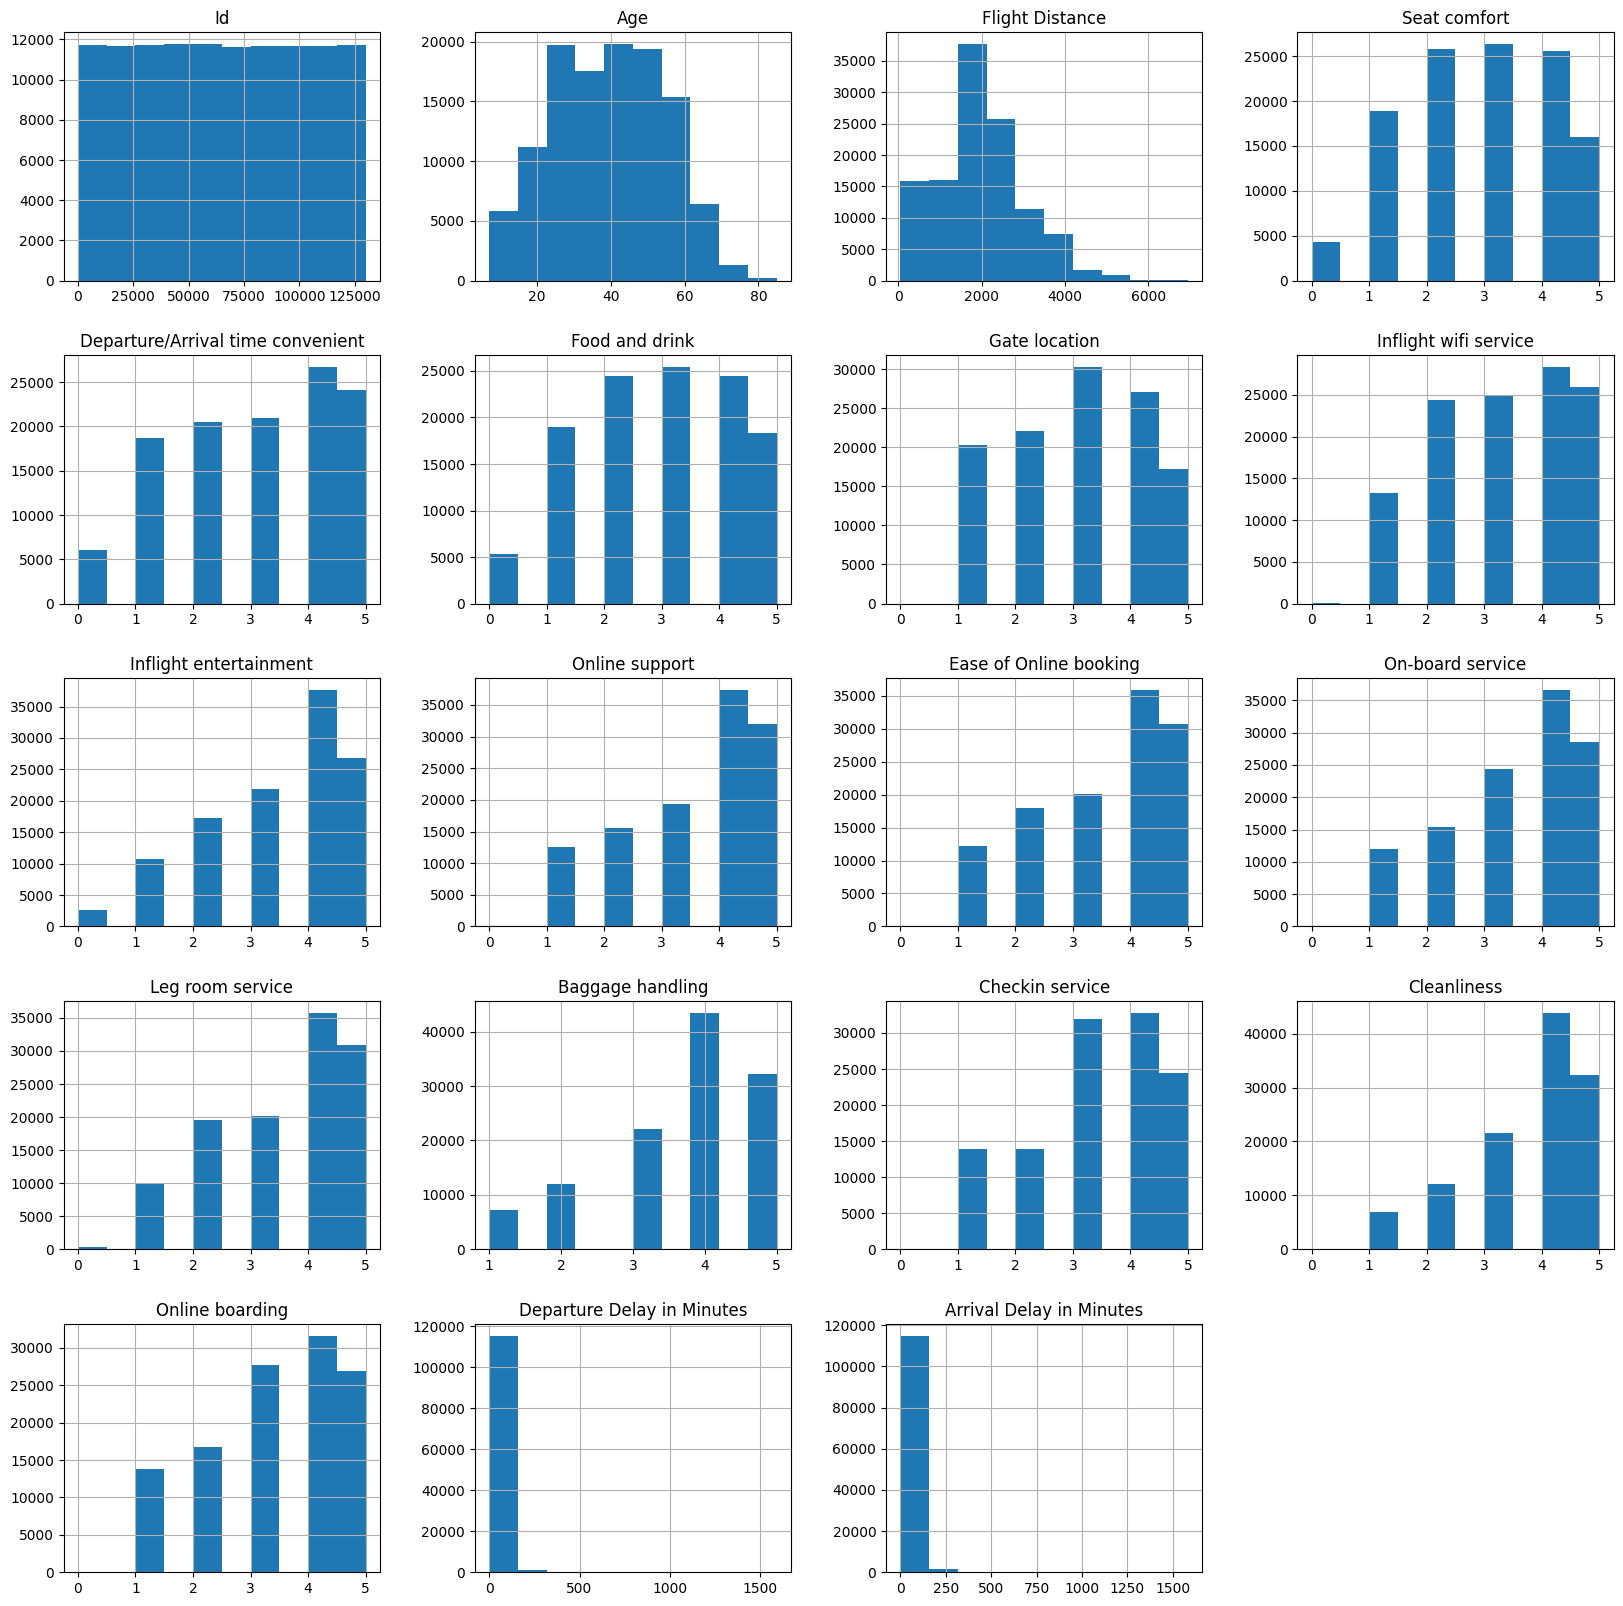

In [11]:
train_df.hist(figsize=(20,20))

In [12]:
train_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].median(), inplace=True)
test_df['Arrival Delay in Minutes'].fillna(test_df['Arrival Delay in Minutes'].median(), inplace=True)

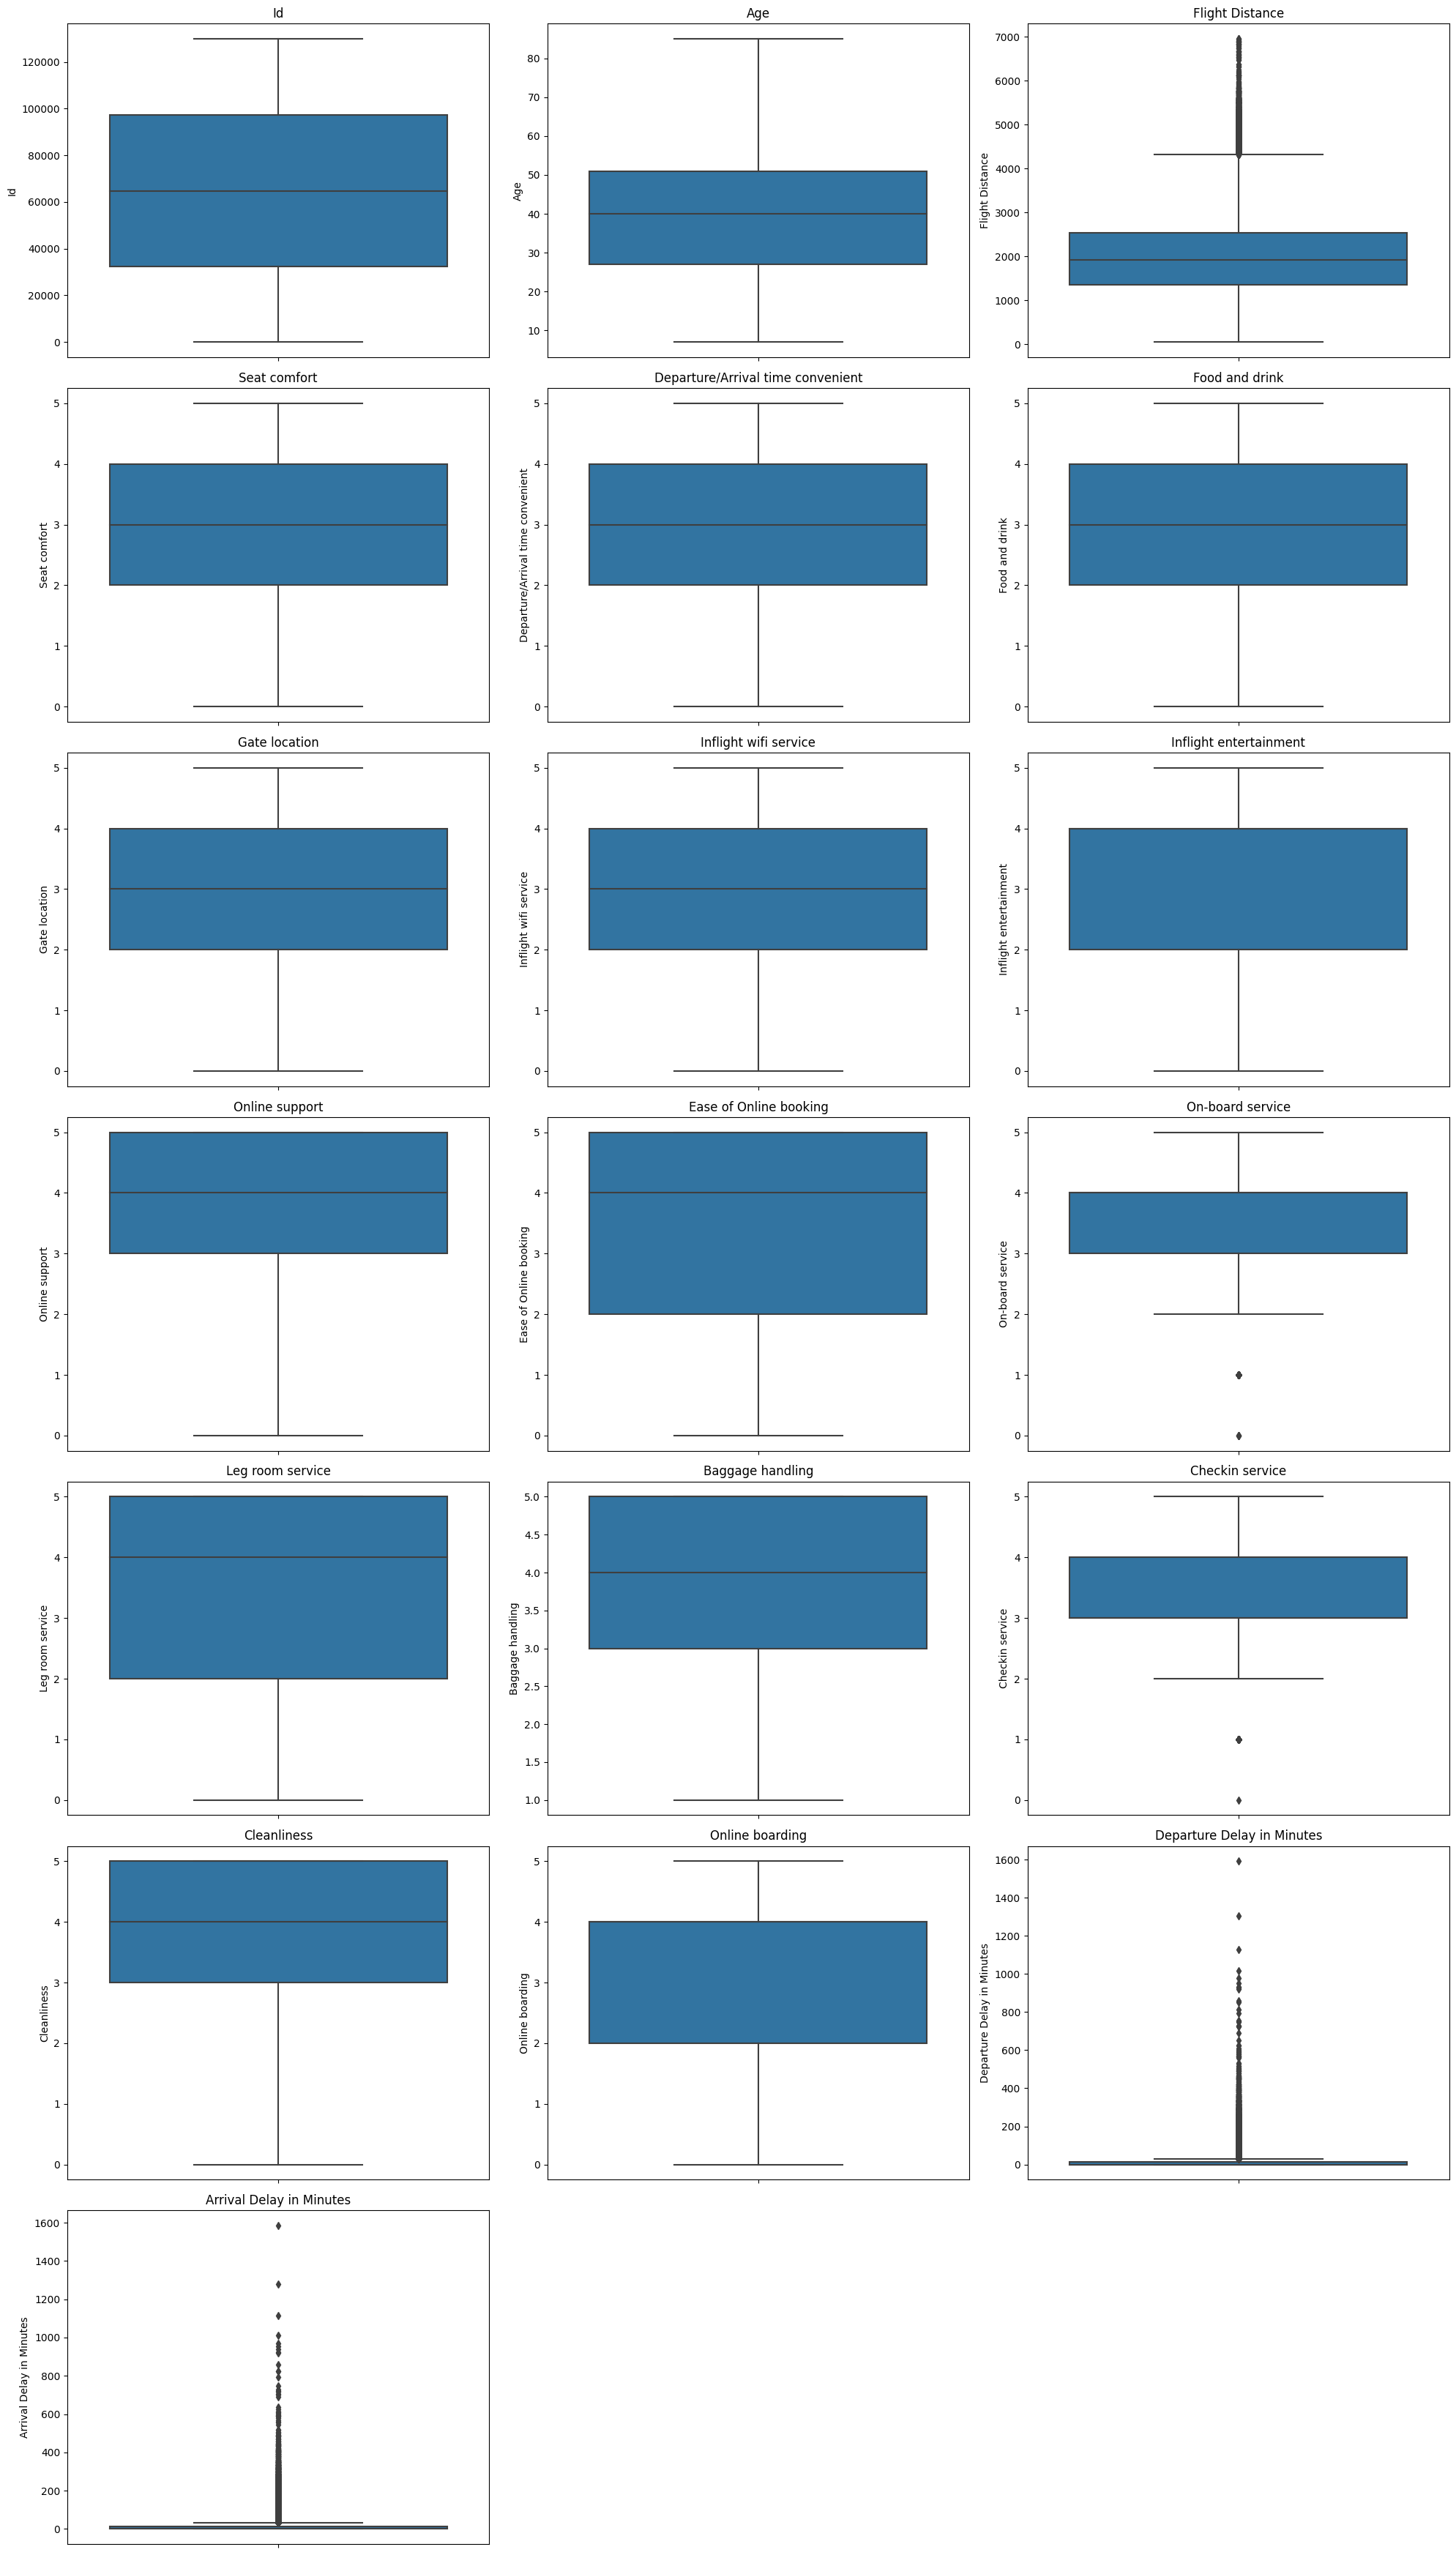

In [13]:
num_columns = len(train_df.select_dtypes(include=np.number).columns)


cols = 3
rows = math.ceil(num_columns / cols)

plt.figure(figsize=(20, 5 * rows))

for i, column in enumerate(train_df.select_dtypes(include=np.number).columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=train_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [14]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

for column in train_df.select_dtypes(include=np.number).columns[:-2]:
    train_df = remove_outliers(train_df, column)

In [15]:
train_df
test_df

,Id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,46587,Female,Disloyal Customer,22,Business Travel,Eco,2354,2,2,2,...,2,2,1,4,3,4,3,2,13,23
1,124920,Male,Loyal Customer,25,Business Travel,Business,2855,2,2,2,...,5,5,3,4,1,1,5,5,0,5
2,18490,Female,Loyal Customer,21,Personal Travel,Eco,1250,4,4,4,...,4,4,4,4,4,4,4,5,0,0
3,78644,Female,Loyal Customer,34,Business Travel,Business,95,1,2,2,...,3,3,3,3,1,3,3,3,12,9
4,92713,Male,Loyal Customer,39,Business Travel,Business,3276,5,2,5,...,5,4,4,4,4,4,4,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12944,125624,Female,Loyal Customer,21,Business Travel,Business,4929,5,5,4,...,5,5,3,2,4,5,4,5,2,0
12945,88138,Male,Loyal Customer,43,Business Travel,Business,2420,3,3,3,...,5,3,3,4,3,3,3,4,17,13
12946,86801,Female,Loyal Customer,60,Business Travel,Eco,96,3,5,5,...,3,4,4,3,4,4,4,1,0,0
12947,78439,Female,Loyal Customer,24,Business Travel,Eco,1915,2,3,3,...,4,2,1,3,4,4,3,2,15,44


## **96.12%**

In [29]:
 # Added this line to import the missing class.


# Identify features
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numerical_features = [
    'Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
    'Food and drink', 'Gate location', 'Inflight wifi service', 
    'Inflight entertainment', 'Online support', 'Ease of Online booking', 
    'On-board service', 'Leg room service', 'Baggage handling', 
    'Checkin service', 'Cleanliness', 'Online boarding', 
    'Departure Delay in Minutes', 'Arrival Delay in Minutes'
]

# Step 1: Convert all categorical columns to strings to ensure uniform data types
train_df[categorical_features] = train_df[categorical_features].astype(str)
test_df[categorical_features] = test_df[categorical_features].astype(str)

# Step 2.1: Encode categorical features in train and test data
le = LabelEncoder()

# Fit LabelEncoder on combined categories from both train and test data to avoid unseen labels
for feature in categorical_features:
    combined_categories = pd.concat([train_df[feature], test_df[feature]], axis=0)
    le.fit(combined_categories)
    
    # Encode training data
    train_df[feature] = le.transform(train_df[feature])
    
    # Encode test data, handle unseen categories
    test_df[feature] = test_df[feature].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Step 2.2: Scale numerical features in both train and test data
scaler = StandardScaler()

# Scale training data
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])

# Scale test data
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

# Step 3: Prepare features and target variable
X = train_df.drop(columns=['Id', 'satisfaction'])
y = le.fit_transform(train_df['satisfaction'])  # Encode target variable

# Step 4: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Set up XGBoost with Hyperparameter Tuning
model = xgb.XGBClassifier(eval_metric='mlogloss')

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2]  # Adjust this if there is class imbalance
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Step 6: Validate the model on the validation set
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Step 7: Prepare test features
X_test = test_df.drop(columns=['Id'], errors='ignore')  # Drop 'Id' if it exists

# Step 8: Make predictions on the test set
predictions = best_model.predict(X_test)

# Step 9: Convert numerical predictions to text labels
# Assuming '1' is 'satisfied' and '0' is 'dissatisfied'
prediction_labels = ['satisfied' if pred == 1 else 'dissatisfied' for pred in predictions]

# Step 10: Create a DataFrame for the predictions
output = pd.DataFrame({'ID': test_df['Id'], 'satisfaction': prediction_labels})

# Step 11: Save predictions to a CSV file
output.to_csv('rookie_coders_1.csv', index=False)

# Print the first few predictions
print(output.head())


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Validation Accuracy: 96.12%
       ID  satisfaction
0   46587  dissatisfied
1  124920     satisfied
2   18490     satisfied
3   78644  dissatisfied
4   92713     satisfied


## **96.26%**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Set a random seed for reproducibility
RANDOM_SEED = 42

# Identify features
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numerical_features = [
    'Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
    'Food and drink', 'Gate location', 'Inflight wifi service', 
    'Inflight entertainment', 'Online support', 'Ease of Online booking', 
    'On-board service', 'Leg room service', 'Baggage handling', 
    'Checkin service', 'Cleanliness', 'Online boarding', 
    'Departure Delay in Minutes', 'Arrival Delay in Minutes'
]

# Step 1: Convert all categorical columns to strings to ensure uniform data types
train_df[categorical_features] = train_df[categorical_features].astype(str)
test_df[categorical_features] = test_df[categorical_features].astype(str)

# Step 2.1: Encode categorical features in train and test data
le = LabelEncoder()

# Fit LabelEncoder on combined categories from both train and test data to avoid unseen labels
for feature in categorical_features:
    combined_categories = pd.concat([train_df[feature], test_df[feature]], axis=0)
    le.fit(combined_categories)
    
    # Encode training data
    train_df[feature] = le.transform(train_df[feature])
    
    # Encode test data, handle unseen categories
    test_df[feature] = test_df[feature].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Step 2.2: Scale numerical features in both train and test data
scaler = StandardScaler()

# Scale training data
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])

# Scale test data
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

# Step 3: Prepare features and target variable
X = train_df.drop(columns=['Id', 'satisfaction'])
y = le.fit_transform(train_df['satisfaction'])  # Encode target variable

# Step 4: Split the data into training and validation sets using the random seed
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Step 5: Set up XGBoost with Hyperparameter Tuning and include random_state
model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=RANDOM_SEED)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2]  # Adjust this if there is class imbalance
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


# Best model from grid search
best_model = grid_search.best_estimator_

# Step 6: Validate the model on the validation set
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Step 7: Prepare test features
X_test = test_df.drop(columns=['Id'], errors='ignore')  # Drop 'Id' if it exists

# Step 8: Make predictions on the test set
predictions = best_model.predict(X_test)

# Step 9: Convert numerical predictions to text labels
# Assuming '1' is 'satisfied' and '0' is 'dissatisfied'
prediction_labels = ['satisfied' if pred == 1 else 'dissatisfied' for pred in predictions]

# Step 10: Create a DataFrame for the predictions
output = pd.DataFrame({'ID': test_df['Id'], 'satisfaction': prediction_labels})

# Step 11: Save predictions to a CSV file
output.to_csv('rookie_coders_2.csv', index=False)

# Print the first few predictions
print(output.head())


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Validation Accuracy: 96.26%
       ID  satisfaction
0   46587  dissatisfied
1  124920     satisfied
2   18490     satisfied
3   78644  dissatisfied
4   92713     satisfied


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Set a random seed for reproducibility
RANDOM_SEED = 42

# Identify features
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numerical_features = [
    'Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
    'Food and drink', 'Gate location', 'Inflight wifi service', 
    'Inflight entertainment', 'Online support', 'Ease of Online booking', 
    'On-board service', 'Leg room service', 'Baggage handling', 
    'Checkin service', 'Cleanliness', 'Online boarding', 
    'Departure Delay in Minutes', 'Arrival Delay in Minutes'
]

# Step 1: Convert all categorical columns to strings to ensure uniform data types
train_df[categorical_features] = train_df[categorical_features].astype(str)
test_df[categorical_features] = test_df[categorical_features].astype(str)

# Step 2.1: Encode categorical features in train and test data
le = LabelEncoder()

# Fit LabelEncoder on combined categories from both train and test data to avoid unseen labels
for feature in categorical_features:
    combined_categories = pd.concat([train_df[feature], test_df[feature]], axis=0)
    le.fit(combined_categories)
    
    # Encode training data
    train_df[feature] = le.transform(train_df[feature])
    
    # Encode test data, handle unseen categories
    test_df[feature] = test_df[feature].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Step 2.2: Scale numerical features in both train and test data
scaler = StandardScaler()

# Scale training data
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])

# Scale test data
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

# Step 3: Prepare features and target variable
X = train_df.drop(columns=['Id', 'satisfaction'])
y = le.fit_transform(train_df['satisfaction'])  # Encode target variable

# Step 4: Split the data into training and validation sets using the random seed
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Step 5: Set up XGBoost with Hyperparameter Tuning and include random_state
model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=RANDOM_SEED)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2]  # Adjust this if there is class imbalance
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


# Best model from grid search
best_model = grid_search.best_estimator_

# Step 6: Validate the model on the validation set
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Step 7: Prepare test features
X_test = test_df.drop(columns=['Id'], errors='ignore')  # Drop 'Id' if it exists

# Step 8: Make predictions on the test set
predictions = best_model.predict(X_test)

# Step 9: Convert numerical predictions to text labels
# Assuming '1' is 'satisfied' and '0' is 'dissatisfied'
prediction_labels = ['satisfied' if pred == 1 else 'dissatisfied' for pred in predictions]

# Step 10: Create a DataFrame for the predictions
output = pd.DataFrame({'ID': test_df['Id'], 'satisfaction': prediction_labels})

# Step 11: Save predictions to a CSV file
output.to_csv('rookie_coders_2.csv', index=False)

# Print the first few predictions
print(output.head())
